In [2]:
import pandas as pd 
import numpy as np

In [3]:
df0 = pd.read_csv('IMDB Dataset.csv')
df0 = df0.loc[:10000, :]

In [4]:
# taking only 10000 rows due to the counvectorizer is giving memory error, as the array formed is larger for my laptop RAM
df0

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
9996,Give me a break. How can anyone say that this ...,negative
9997,This movie is a bad movie. But after watching ...,negative
9998,This is a movie that was probably made to ente...,negative
9999,Smashing film about film-making. Shows the int...,positive


In [6]:
df0.duplicated().sum()

17

In [7]:
# there are 418 duplicate rows, drop them
df0.drop_duplicates(inplace=True, ignore_index=True)
df0.duplicated().sum()

0

In [8]:
# get stopwords from nltk
# As we are doing text classification , stopwords are of no use
from nltk.corpus import stopwords
stopwords_eng = stopwords.words('english')
stopwords_eng

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
# chat words removal
import json

with open('chat_words.json') as f:
    chat_words = json.load(f)

In [10]:
# punctuations removal
import string
punc = string.punctuation

In [11]:
# encompasing all preprocessing steps for the string in each row
import re
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer

def preprocessing(text):
    text = re.sub(re.compile('<.*?> '),'',text)
    text = re.sub('[0-90-9]','',text)
    for char in punc:
        text = text.replace(char, '')
    text = text.lower()
    text = [ word for word in word_tokenize(text) if word.lower() not in stopwords_eng]
    text = [ chat_words[word.upper()].lower() if word.upper() in chat_words else word for word in text]
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text]
    return ' '.join(text)

In [12]:
# creating new dataframe
df1 = df0.copy()

In [13]:
# label encoding the output column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['sentiment'] = le.fit_transform(df1['sentiment'])

In [14]:
df1

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
9979,Give me a break. How can anyone say that this ...,0
9980,This movie is a bad movie. But after watching ...,0
9981,This is a movie that was probably made to ente...,0
9982,Smashing film about film-making. Shows the int...,1


In [15]:
# applying preprosessing steps
df1['review'] = df1['review'].apply(preprocessing)
df1.head()

,review,sentiment
0,one review mention watch oz episod youll hook ...,1
1,wonder littl product br br film techniqu unass...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


In [194]:
# train test split for training and testing purpose
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df1['review'], df1['sentiment'],test_size=0.2)

In [195]:
# Applying Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=2000)

x_train_bow = cv.fit_transform(x_train).toarray()
x_test_bow = cv.transform(x_test).toarray()

In [196]:
x_train_bow

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [197]:
# Applying Randomforest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_bow,y_train)

RandomForestClassifier()

accuracy_score 0.8117175763645468
precision_score 0.8157370517928287
recall_score 0.810891089108911
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       987
           1       0.82      0.81      0.81      1010

    accuracy                           0.81      1997
   macro avg       0.81      0.81      0.81      1997
weighted avg       0.81      0.81      0.81      1997



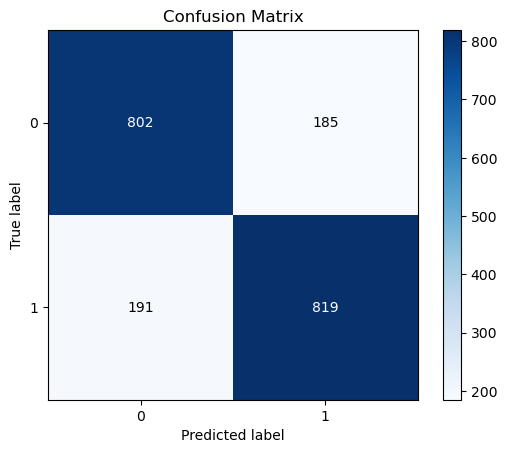

In [198]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix

y_pred = rf.predict(x_test_bow)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

accuracy_score 0.7591387080620932
precision_score 0.8036739380022963
recall_score 0.693069306930693
              precision    recall  f1-score   support

           0       0.72      0.83      0.77       987
           1       0.80      0.69      0.74      1010

    accuracy                           0.76      1997
   macro avg       0.76      0.76      0.76      1997
weighted avg       0.76      0.76      0.76      1997



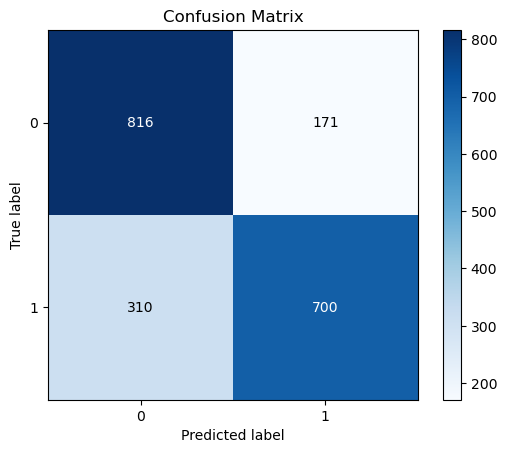

In [199]:
# Applying Naive bayes algorithm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix

gnb = GaussianNB()
gnb.fit(x_train_bow,y_train)

y_pred = gnb.predict(x_test_bow)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

In [200]:
# Applying N grams

from sklearn.feature_extraction.text import CountVectorizer

cvn = CountVectorizer(ngram_range=(1,2), max_features=10000)

x_train_cvn = cvn.fit_transform(x_train).toarray()
x_test_cvn = cvn.transform(x_test).toarray()

accuracy_score 0.7966950425638458
precision_score 0.7954990215264188
recall_score 0.804950495049505
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       987
           1       0.80      0.80      0.80      1010

    accuracy                           0.80      1997
   macro avg       0.80      0.80      0.80      1997
weighted avg       0.80      0.80      0.80      1997



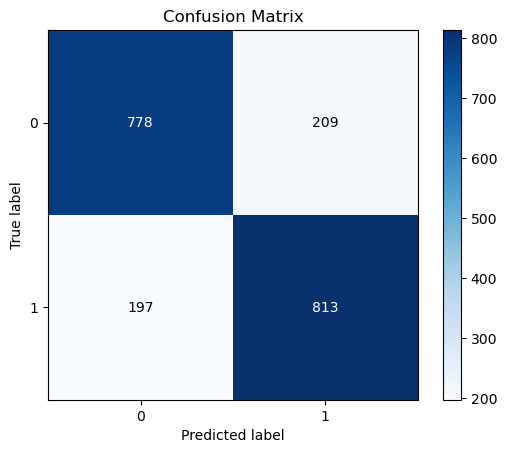

In [201]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix

gnb = GaussianNB()
gnb.fit(x_train_cvn,y_train)

y_pred = gnb.predict(x_test_cvn)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

accuracy_score 0.8312468703054582
precision_score 0.8328387734915925
recall_score 0.8336633663366336
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       987
           1       0.83      0.83      0.83      1010

    accuracy                           0.83      1997
   macro avg       0.83      0.83      0.83      1997
weighted avg       0.83      0.83      0.83      1997



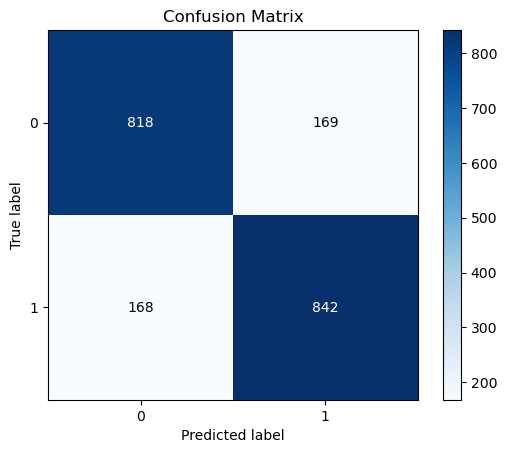

In [202]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_cvn,y_train)

y_pred = rf.predict(x_test_cvn)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

# Applying Tfidf Vectorizer

In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [210]:
print(x_train_tfidf.shape)
print(x_test_tfidf.shape)
print(y_train.shape)
print(y_test.shape)

(7987, 47746)
(1997, 47746)
(7987,)
(1997,)


accuracy_score 0.8242363545317977
precision_score 0.8272095332671301
recall_score 0.8247524752475247
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       987
           1       0.83      0.82      0.83      1010

    accuracy                           0.82      1997
   macro avg       0.82      0.82      0.82      1997
weighted avg       0.82      0.82      0.82      1997



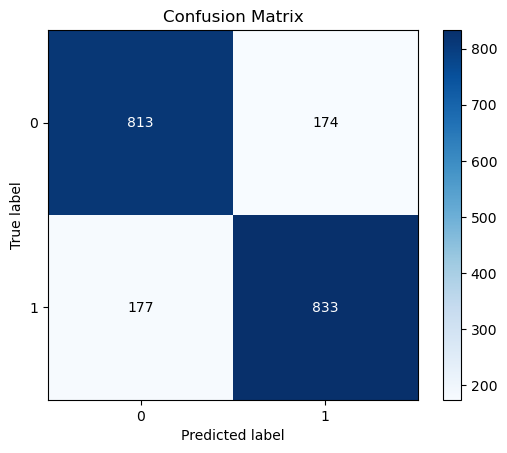

In [211]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train_tfidf,y_train)

y_pred = rf.predict(x_test_tfidf)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix

gnb = GaussianNB()
gnb.fit(x_train_tfidf,y_train)

y_pred = gnb.predict(x_test_tfidf)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

# Using Word2vec to get vectors (Word embeddings)

In [18]:
df1

,review,sentiment
0,one review mention watch oz episod youll hook ...,1
1,wonder littl product br br film techniqu unass...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1
...,...,...
9979,give break anyon say good hockey movi know mov...,0
9980,movi bad movi watch endless seri bad horror mo...,0
9981,movi probabl made entertain middl school earli...,0
9982,smash film filmmak show intens strang relation...,1


In [19]:
import gensim
from gensim.models import word2vec
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [20]:
story = []
for doc in df1['review']:
    raw_sent = sent_tokenize(doc)
    for sent in raw_sent:
        story.append(simple_preprocess(sent))

In [21]:
len(story)

9984

In [22]:
model = gensim.models.Word2Vec(window = 10, min_count = 2)

In [23]:
model.build_vocab(story)

In [24]:
model.train(story, total_examples= model.corpus_count, epochs= model.epochs)

(5525448, 6049345)

In [25]:
len(model.wv.index_to_key)

25385

In [26]:
def document_vector(doc):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    return np.mean(model.wv[doc], axis=0)

In [27]:
df1['review'].values[0]

'one review mention watch oz episod youll hook right exactli happen mebr br first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordbr br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awaybr br would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may

In [28]:
model.wv['one']

array([-0.31598082,  0.55896246, -0.49721974,  0.47226304, -0.5013376 ,
       -0.80133677,  0.8898962 ,  0.802808  , -0.05744652,  0.361241  ,
        1.3109117 ,  0.08016648,  0.5460434 ,  0.01949148,  0.5450625 ,
        0.4695133 ,  1.821203  ,  0.05696123, -1.116494  ,  0.38573098,
        0.84164953,  0.9491438 , -0.60415125, -0.24033114, -0.82194996,
        1.1416922 ,  0.26898792, -0.09047866, -0.20090161, -0.5425442 ,
        1.4266042 , -0.2339508 ,  0.68331474, -0.5800719 ,  0.29373246,
        1.4119377 ,  0.2169678 ,  0.10085644, -0.86413366, -0.50332695,
        0.30943686, -0.5960465 ,  0.41318056, -0.5674127 ,  0.8358124 ,
       -0.2847032 , -0.11743605, -0.5530493 ,  0.0699605 , -0.5834308 ,
        0.12399588, -1.2887956 , -0.42904425, -1.2602376 ,  0.53954864,
       -0.05458212,  0.9693274 ,  0.03854803,  0.15605037, -0.38162273,
        0.145538  ,  0.02461916,  0.9125448 , -0.08927616, -0.7731991 ,
        1.5927706 ,  0.36530465,  1.3521638 , -1.0244714 ,  0.92

In [29]:
document_vector(df1['review'].values[0])

array([-0.30089617,  0.38011408, -0.0713157 , -0.06427795, -0.05177872,
       -0.6821412 ,  0.24257176,  0.73808193,  0.04514675, -0.20039363,
       -0.19536698, -0.54291   , -0.05740067,  0.1846511 , -0.19433457,
       -0.21914929,  0.219603  , -0.3788972 , -0.12836595, -0.63845927,
        0.16947524,  0.3975049 ,  0.15199772, -0.18272148, -0.00932293,
        0.177186  , -0.20951359, -0.23451944, -0.48701578, -0.00206851,
        0.33581415, -0.04409201,  0.07131851, -0.38704148, -0.12775521,
        0.34502083, -0.0832112 , -0.043565  , -0.163342  , -0.542641  ,
       -0.1248936 , -0.22810419, -0.17902862, -0.2633278 ,  0.38448927,
       -0.38380483, -0.16006845, -0.03086321,  0.30869368,  0.28393453,
        0.2046049 , -0.16874982,  0.03010858, -0.16256277, -0.17039661,
        0.12191138,  0.25014418, -0.1041334 , -0.09923239, -0.04297246,
        0.26448077,  0.04201419, -0.15149069,  0.03095205, -0.48915046,
        0.36763063, -0.01540431,  0.06567761, -0.42794508,  0.39

In [30]:
from tqdm import tqdm
X = []
for doc in tqdm(df1['review'].values):
    X.append(document_vector(doc))

  0%|          | 0/9984 [00:00<?, ?it/s]

100%|██████████| 9984/9984 [02:39<00:00, 62.53it/s] 


In [34]:
X = np.array(X)

In [35]:
X.shape

(9984, 100)

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(df1['sentiment'])

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.2)

accuracy_score 0.8027040560841262
precision_score 0.8058823529411765
recall_score 0.8074656188605108
              precision    recall  f1-score   support

           0       0.80      0.80      0.80       979
           1       0.81      0.81      0.81      1018

    accuracy                           0.80      1997
   macro avg       0.80      0.80      0.80      1997
weighted avg       0.80      0.80      0.80      1997



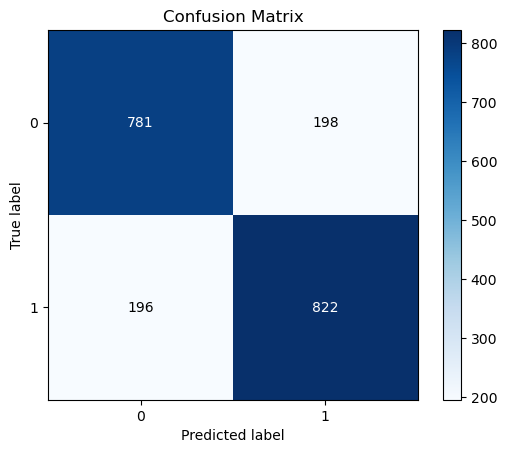

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

y_pred = rf.predict(x_test)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)

accuracy_score 0.7541311967951928
precision_score 0.7555771096023278
recall_score 0.7652259332023575
              precision    recall  f1-score   support

           0       0.75      0.74      0.75       979
           1       0.76      0.77      0.76      1018

    accuracy                           0.75      1997
   macro avg       0.75      0.75      0.75      1997
weighted avg       0.75      0.75      0.75      1997



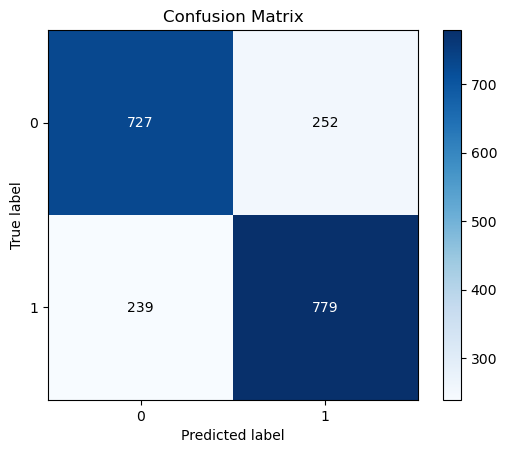

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix

gnb = GaussianNB()
gnb.fit(x_train,y_train)

y_pred = gnb.predict(x_test)

plot_confusion_matrix(y_test,y_pred)
print('accuracy_score', accuracy_score(y_test,y_pred))
print('precision_score', precision_score(y_test,y_pred))
print('recall_score', recall_score(y_test,y_pred))
cr = classification_report(y_test,y_pred)
print(cr)